In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns

In [32]:
font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font)

강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

강서_데이터1 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
강서_데이터2 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_02.csv',encoding='utf-8')

강서_데이터 = pd.concat([강서_데이터1, 강서_데이터2], ignore_index=True)
print(len(강서_데이터))
일별_강서_데이터= 강서_데이터.groupby('기준_날짜')['전체_건수'].sum()

3385613


In [33]:
기상청_데이터 = pd. read_csv('../../Data/기상청/기온강수량미세먼지2.csv',encoding='utf-8')
type(기상청_데이터)

pandas.core.frame.DataFrame

In [34]:
기상청_데이터.fillna(0, inplace=True)

In [35]:
# Series를 DataFrame으로 변환
일별_강서_데이터 = pd.DataFrame(일별_강서_데이터.items(), columns=['기준_날짜', '전체_건수'])


In [36]:
일별_강서_데이터

,기준_날짜,전체_건수
0,2023-04-03,16354
1,2023-04-04,13309
2,2023-04-05,2191
3,2023-04-06,7303
4,2023-04-07,14320
...,...,...
236,2024-03-25,6757
237,2024-03-26,9299
238,2024-03-27,15206
239,2024-03-28,9280


In [37]:
import pandas as pd
# 휴일 데이터
휴일 = [
    {"날짜": "2023-05-05"},
    {"날짜": "2023-05-29"},
    {"날짜": "2023-06-06"},
    {"날짜": "2023-08-15"},
    {"날짜": "2023-09-28"},
    {"날짜": "2023-09-29"},
    {"날짜": "2023-10-02"},
    {"날짜": "2023-10-03"},
    {"날짜": "2023-10-09"},
    {"날짜": "2023-12-25"},
    {"날짜": "2024-01-01"},
    {"날짜": "2024-02-09"},
    {"날짜": "2024-02-12"},
    {"날짜": "2024-03-01"},
]
# 주말과 휴일을 분류하는 함수 정의
def classify_weekend_and_holidays(df, holidays):
    # '일시' 열을 datetime 형식으로 변환
    df['일시'] = pd.to_datetime(df['일시'])
    
    # 주말(토요일: 5, 일요일: 6)인지 여부를 나타내는 열 추가
    df['요일'] = df['일시'].dt.dayofweek  # 0: 월요일, 1: 화요일, ..., 6: 일요일
    df['주말'] = df['요일'].apply(lambda x: 1 if x >= 5 else 0)  # 토요일(5) 또는 일요일(6)이면 주말로 분류
    
    # 휴일인지 여부를 나타내는 열 추가
    df['휴일'] = df['일시'].apply(lambda x: 1 if str(x.date()) in [h['날짜'] for h in holidays] else 0)
    
    # 주말과 휴일으로 데이터 분리
    주말_df = df[(df['주말'] == 1) | (df['휴일'] == 1)]
    주중_df = df[(df['주말'] == 0) & (df['휴일'] == 0)]
    
    return 주말_df, 주중_df

# 함수 호출
기상청_주말_데이터, 기상청_주중_데이터 = classify_weekend_and_holidays(기상청_데이터, 휴일)


In [38]:
기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)
기상청_주중_데이터

C:\Users\ciw96\AppData\Local\Temp\ipykernel_50640\2369903020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터.rename(columns={'일시': '기준_날짜'}, inplace=True)


,기준_날짜,미세먼지,초미세먼지,지점,지점명,평균기온(°C),일강수량(mm),요일,주말,휴일
2,2023-04-03,58,32,108,서울,19.0,0.0,0,0,0
3,2023-04-04,38,18,108,서울,17.6,6.9,1,0,0
4,2023-04-05,20,10,108,서울,11.9,50.3,2,0,0
5,2023-04-06,73,55,108,서울,8.8,2.7,3,0,0
6,2023-04-07,74,33,108,서울,8.9,0.0,4,0,0
...,...,...,...,...,...,...,...,...,...,...
390,2024-03-25,25,9,108,서울,10.6,5.1,0,0,0
391,2024-03-26,4,1,108,서울,7.4,11.5,1,0,0
392,2024-03-27,24,15,108,서울,10.4,0.0,2,0,0
393,2024-03-28,25,11,108,서울,10.3,1.9,3,0,0


In [40]:
# 기상청_주중_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])

# 일별_강서_데이터의 '기준_날짜' 열을 datetime 형식으로 변환
일별_강서_데이터['기준_날짜'] = pd.to_datetime(일별_강서_데이터['기준_날짜'])

# 두 데이터프레임의 '기준_날짜' 값을 비교하여 있는 값과 없는 값을 구분
공통_날짜 = pd.merge(기상청_주중_데이터, 일별_강서_데이터, on='기준_날짜', how='inner')['기준_날짜']
기상청_누락_날짜 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']
강서_누락_날짜 = 일별_강서_데이터[~일별_강서_데이터['기준_날짜'].isin(공통_날짜)]['기준_날짜']

print("기상청 데이터에만 있는 날짜:")
print(기상청_누락_날짜)
기상청_주중_데이터 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(기상청_누락_날짜)]


기상청 데이터에만 있는 날짜:
307   2024-01-02
341   2024-02-05
342   2024-02-06
355   2024-02-19
356   2024-02-20
Name: 기준_날짜, dtype: datetime64[ns]


C:\Users\ciw96\AppData\Local\Temp\ipykernel_50640\4210034619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  기상청_주중_데이터['기준_날짜'] = pd.to_datetime(기상청_주중_데이터['기준_날짜'])


In [1]:
기상청_주중_데이터 = 기상청_주중_데이터[~기상청_주중_데이터['기준_날짜'].isin(기상청_누락_날짜)]

NameError: name '기상청_주중_데이터' is not defined

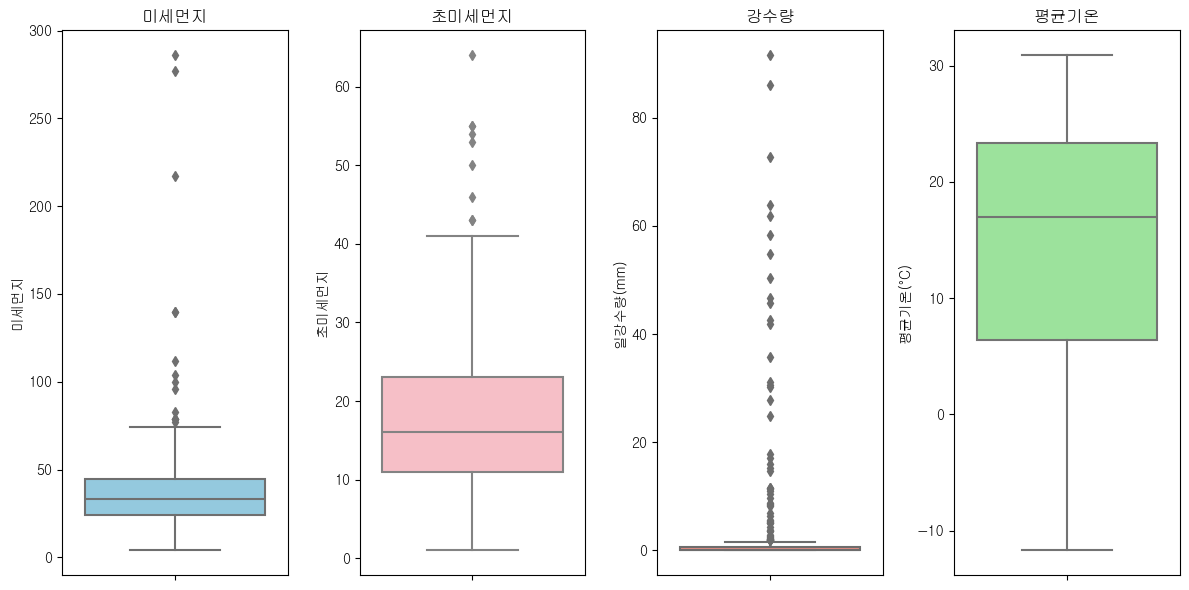

In [42]:

# 이상치를 보기 위해 기상 데이터와 강수량, 평균 기온, 초미세먼지를 병합
기상청 = pd.concat([기상청_주중_데이터[['미세먼지', '초미세먼지', '일강수량(mm)', '평균기온(°C)']], 일별_강서_데이터['전체_건수']], axis=1)

# Boxplot 그리기
plt.figure(figsize=(12, 6))

# 미세먼지의 Boxplot
plt.subplot(1, 4, 1)
sns.boxplot(y=기상청['미세먼지'], color='skyblue')
plt.title('미세먼지')

# 초미세먼지의 Boxplot
plt.subplot(1, 4, 2)
sns.boxplot(y=기상청['초미세먼지'], color='lightpink')
plt.title('초미세먼지')

# 강수량의 Boxplot
plt.subplot(1, 4, 3)
sns.boxplot(y=기상청['일강수량(mm)'], color='salmon')
plt.title('강수량')

# 평균 기온의 Boxplot
plt.subplot(1, 4, 4)
sns.boxplot(y=기상청['평균기온(°C)'], color='lightgreen')
plt.title('평균기온')

plt.tight_layout()
plt.show()

In [44]:

# 기상청 데이터와 일별 데이터를 기준_날짜를 기준으로 병합
기상청_분석 = pd.merge(기상청_주중_데이터, 일별_강서_데이터, on='기준_날짜', how='inner')

# 상관관계 계산
correlation_micron = 기상청_분석['미세먼지'].corr(기상청_분석['전체_건수'])
correlation_micron2 = 기상청_분석['초미세먼지'].corr(기상청_분석['전체_건수'])
correlation_rainfall = 기상청_분석['일강수량(mm)'].corr(기상청_분석['전체_건수'])
correlation_temperature = 기상청_분석['평균기온(°C)'].corr(기상청_분석['전체_건수'])
correlation_all = 기상청_분석[['미세먼지','초미세먼지', '일강수량(mm)', '평균기온(°C)','전체_건수']].corr()['전체_건수']


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

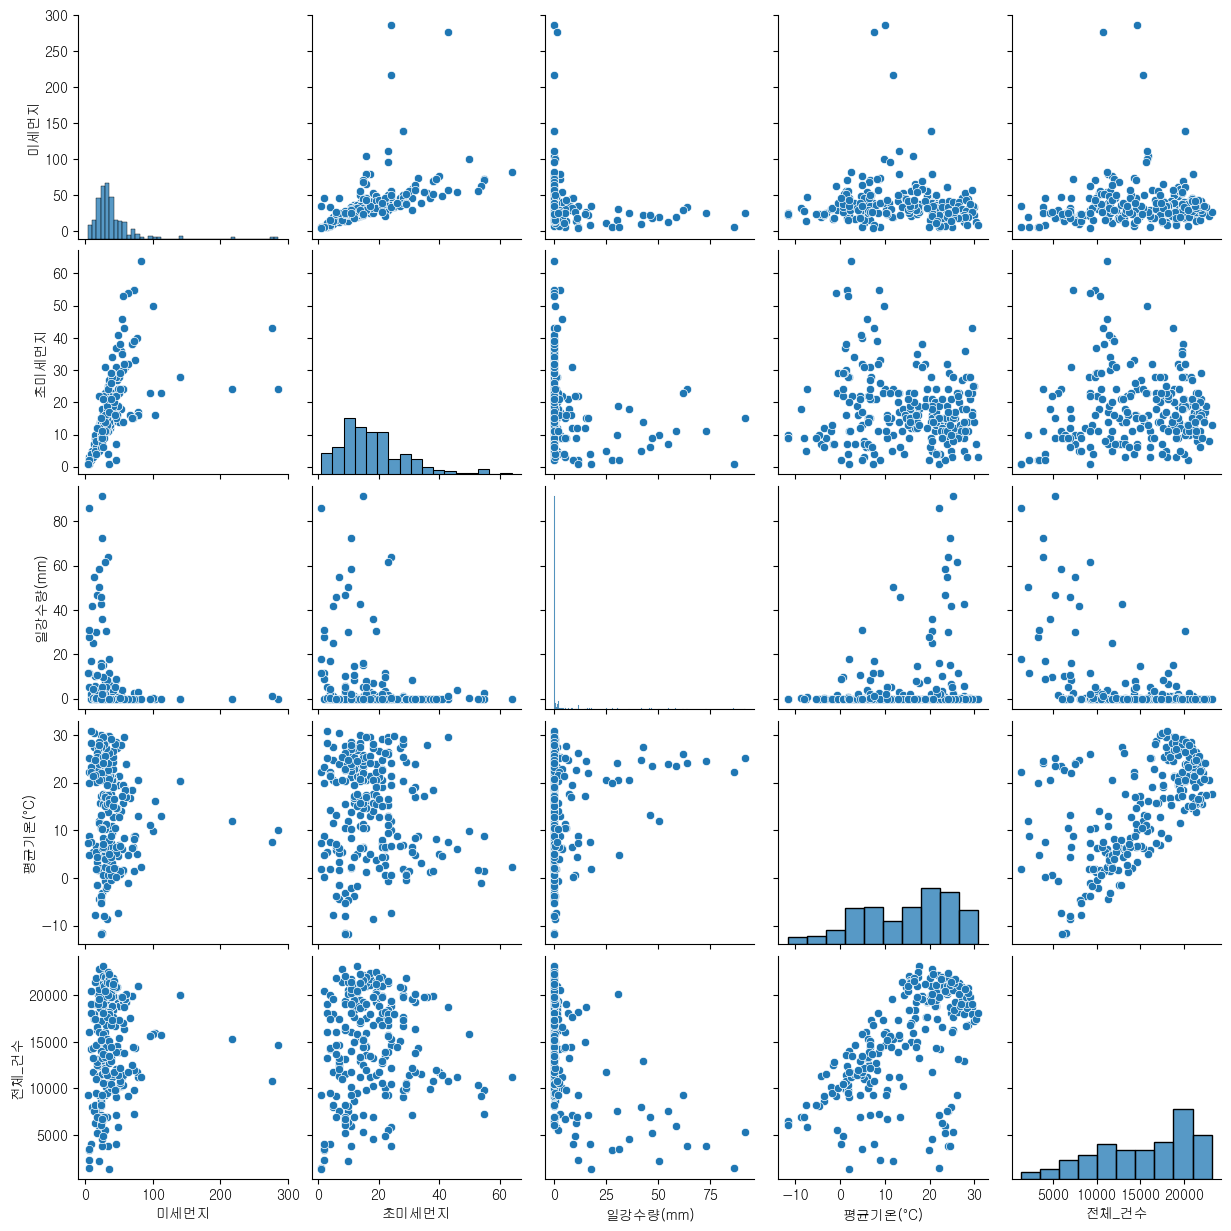

미세먼지와 전체_건수의 상관관계: 0.06285749066215539
초미세먼지와 전체_건수의 상관관계: 0.040195739036415955
강수량과 전체_건수의 상관관계: -0.4911054970043694
평균기온과 전체_건수의 상관관계: 0.6030319747813816
위 3가지와 전체_건수의 상관관계:
미세먼지        0.062857
초미세먼지       0.040196
일강수량(mm)   -0.491105
평균기온(°C)    0.603032
전체_건수       1.000000
Name: 전체_건수, dtype: float64


In [45]:

# 시각화    
sns.pairplot(기상청_분석[['미세먼지','초미세먼지','일강수량(mm)', '평균기온(°C)', '전체_건수']])
plt.show()

# 상관관계 출력
print("미세먼지와 전체_건수의 상관관계:", correlation_micron)
print("초미세먼지와 전체_건수의 상관관계:", correlation_micron2)
print("강수량과 전체_건수의 상관관계:", correlation_rainfall)
print("평균기온과 전체_건수의 상관관계:", correlation_temperature)
print("위 3가지와 전체_건수의 상관관계:")
print(correlation_all)

In [78]:
기상청_분석

,미세먼지,초미세먼지,평균기온,일강수량,전체_건수
기준_날짜,,,,,
2023-04-03,58,32,19.0,0.0,16354
2023-04-04,38,18,17.6,6.9,13309
2023-04-05,20,10,11.9,50.3,2191
2023-04-06,73,55,8.8,2.7,7303
2023-04-07,74,33,8.9,0.0,14320
...,...,...,...,...,...
2024-03-25,25,9,10.6,5.1,6757
2024-03-26,4,1,7.4,11.5,9299
2024-03-27,24,15,10.4,0.0,15206


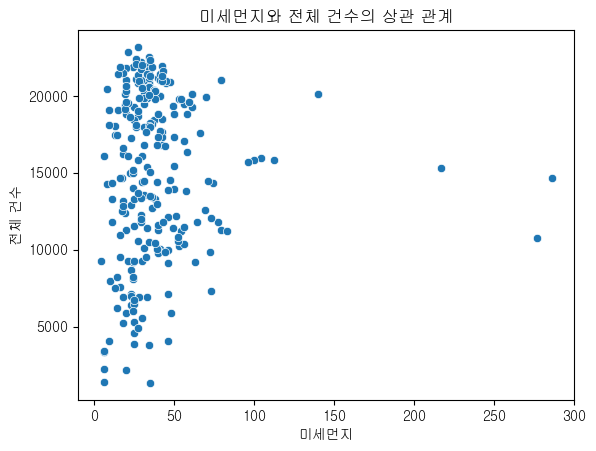

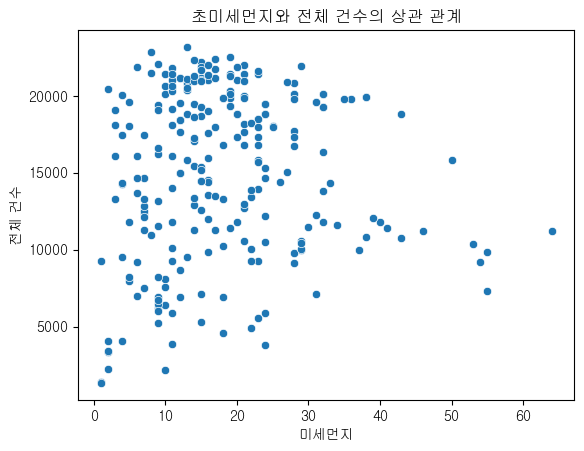

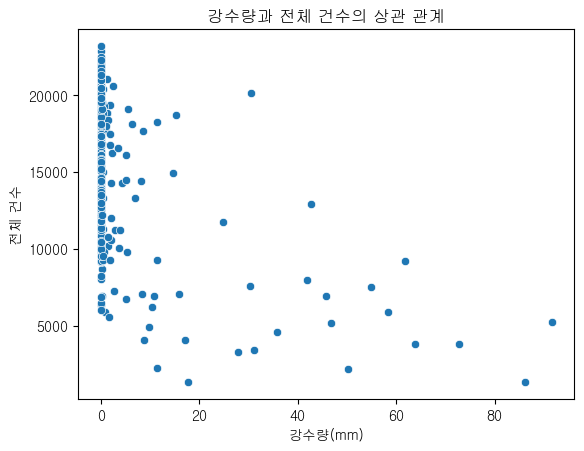

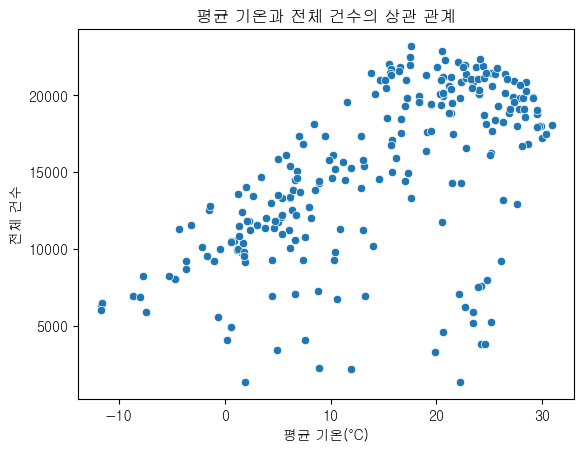

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# 미세먼지와 전체 건수의 시각화
sns.scatterplot(x='미세먼지', y='전체_건수', data=기상청_분석)
plt.title("미세먼지와 전체 건수의 상관 관계")
plt.xlabel("미세먼지")
plt.ylabel("전체 건수")
plt.show()

# 초미세먼지와 전체 건수의 시각화
sns.scatterplot(x='초미세먼지', y='전체_건수', data=기상청_분석)
plt.title("초미세먼지와 전체 건수의 상관 관계")
plt.xlabel("미세먼지")
plt.ylabel("전체 건수")
plt.show()

# 강수량과 전체 건수의 시각화
sns.scatterplot(x='일강수량(mm)', y='전체_건수', data=기상청_분석)
plt.title("강수량과 전체 건수의 상관 관계")
plt.xlabel("강수량(mm)")
plt.ylabel("전체 건수")
plt.show()

# 평균 기온과 전체 건수의 시각화
sns.scatterplot(x='평균기온(°C)', y='전체_건수', data=기상청_분석)
plt.title("평균 기온과 전체 건수의 상관 관계")
plt.xlabel("평균 기온(°C)")
plt.ylabel("전체 건수")
plt.show()

In [47]:
selected_columns = ['기준_날짜', '미세먼지', '초미세먼지', '평균기온(°C)', '일강수량(mm)', '전체_건수']
기상청_분석 = 기상청_분석[selected_columns ]
기상청_분석 = 기상청_분석.rename(columns={'평균기온(°C)': '평균기온', '일강수량(mm)': '일강수량'})
기상청_분석

,기준_날짜,미세먼지,초미세먼지,평균기온,일강수량,전체_건수
0,2023-04-03,58,32,19.0,0.0,16354
1,2023-04-04,38,18,17.6,6.9,13309
2,2023-04-05,20,10,11.9,50.3,2191
3,2023-04-06,73,55,8.8,2.7,7303
4,2023-04-07,74,33,8.9,0.0,14320
...,...,...,...,...,...,...
257,2024-03-25,25,9,10.6,5.1,6757
258,2024-03-26,4,1,7.4,11.5,9299
259,2024-03-27,24,15,10.4,0.0,15206
260,2024-03-28,25,11,10.3,1.9,9280


In [48]:
기상청_분석.to_csv('../../Data/기상청/기상청_분석.csv',index=False)

In [51]:
import statsmodels.api as sm

# 회귀 분석을 위한 데이터셋 준비
기상청_분석.dropna(inplace=True)  # 결측치가 있는 행 제거
X = 기상청_분석[['일강수량', '평균기온']]
y = 기상청_분석['전체_건수']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 결과 요약
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     344.0
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.23e-73
Time:                        12:07:59   Log-Likelihood:                -2453.5
No. Observations:                 262   AIC:                             4913.
Df Residuals:                     259   BIC:                             4924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.081e+04    310.314     34.842      0.0

coef : 회귀 계수           : 일강수량, 평균기온이 전체이용량에 미치는 영향

std err : 계수의 표준 오차 : 작을수록 추정치에 정확

t-statistic(t) : 값이 크면 독립변수가 ㅈ종속변수에 미치는 영향이 유의미함

p-value : 0.05 작아야 통계적으로 유의미한 영향을 줌

[0.025      0.975] : 신뢰구간 

In [55]:
기상청_분석


,기준_날짜,미세먼지,초미세먼지,평균기온,일강수량,전체_건수
0,2023-04-03,58,32,19.0,0.0,16354
1,2023-04-04,38,18,17.6,6.9,13309
2,2023-04-05,20,10,11.9,50.3,2191
3,2023-04-06,73,55,8.8,2.7,7303
4,2023-04-07,74,33,8.9,0.0,14320
...,...,...,...,...,...,...
257,2024-03-25,25,9,10.6,5.1,6757
258,2024-03-26,4,1,7.4,11.5,9299
259,2024-03-27,24,15,10.4,0.0,15206
260,2024-03-28,25,11,10.3,1.9,9280


In [60]:
# 4~10 월 데이터 추출
특정달_기상청_분석 = 기상청_분석[(기상청_분석['기준_날짜'] >= '2023-04-01') & (기상청_분석['기준_날짜'] <= '2023-10-31')]

# 일강수량과 전체 건수 간의 상관관계 분석
correlation = 특정달_기상청_분석['일강수량'].corr(특정달_기상청_분석['전체_건수'])
print(correlation)

-0.7754638839621482


In [61]:
# 독립 변수(X): 평균기온
X = 기상청_분석['평균기온']

# 종속 변수(Y): 전체_건수
Y = 기상청_분석['전체_건수']

# 상수항 추가
X = sm.add_constant(X)

# OLS 회귀 모델 적합
model = sm.OLS(Y, X)

# 적합된 모델 피팅
results = model.fit()

# 회귀 결과 출력
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  전체_건수   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     148.6
Date:                Mon, 06 May 2024   Prob (F-statistic):           2.46e-27
Time:                        14:38:23   Log-Likelihood:                -2564.1
No. Observations:                 262   AIC:                             5132.
Df Residuals:                     260   BIC:                             5139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.054e+04    471.889     22.341      0.0

In [63]:
results_list = []

# 0°C부터 30°C까지의 기온에 대해 예상 자전거 이용량 계산
for temperature in range(0, 31):
    predicted_bike_count = results.params['const'] + results.params['평균기온'] * temperature
    results_list.append({'기온(°C)': temperature, '예상 자전거 이용량': predicted_bike_count})

# 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results_list)

print(results_df)

    기온(°C)    예상 자전거 이용량
0        0  10542.452882
1        1  10862.368773
2        2  11182.284663
3        3  11502.200554
4        4  11822.116445
5        5  12142.032336
6        6  12461.948226
7        7  12781.864117
8        8  13101.780008
9        9  13421.695899
10      10  13741.611789
11      11  14061.527680
12      12  14381.443571
13      13  14701.359462
14      14  15021.275353
15      15  15341.191243
16      16  15661.107134
17      17  15981.023025
18      18  16300.938916
19      19  16620.854806
20      20  16940.770697
21      21  17260.686588
22      22  17580.602479
23      23  17900.518369
24      24  18220.434260
25      25  18540.350151
26      26  18860.266042
27      27  19180.181932
28      28  19500.097823
29      29  19820.013714
30      30  20139.929605


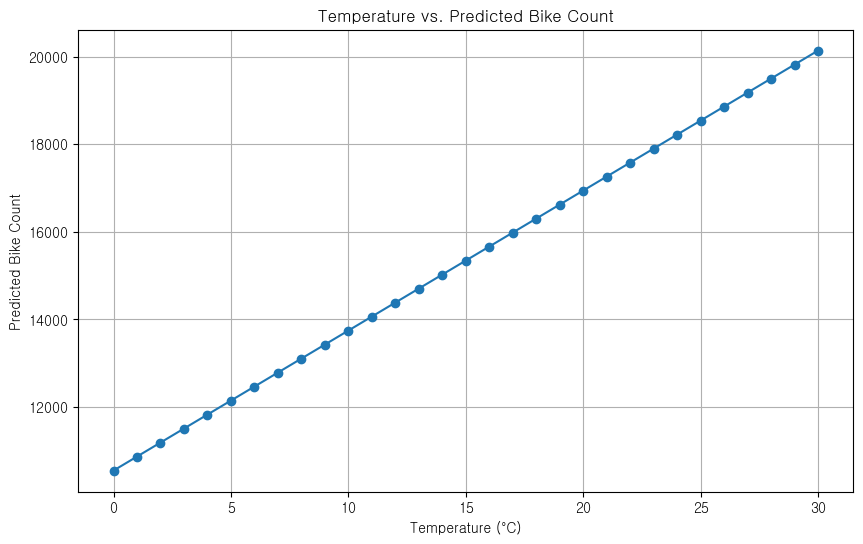

In [64]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 예상 자전거 이용량 데이터 시각화
plt.plot(results_df['기온(°C)'], results_df['예상 자전거 이용량'], marker='o', linestyle='-')

# 그래프 제목과 축 레이블 설정
plt.title('Temperature vs. Predicted Bike Count')
plt.xlabel('Temperature (°C)')
plt.ylabel('Predicted Bike Count')

# 그리드 추가
plt.grid(True)

# 그래프 표시
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


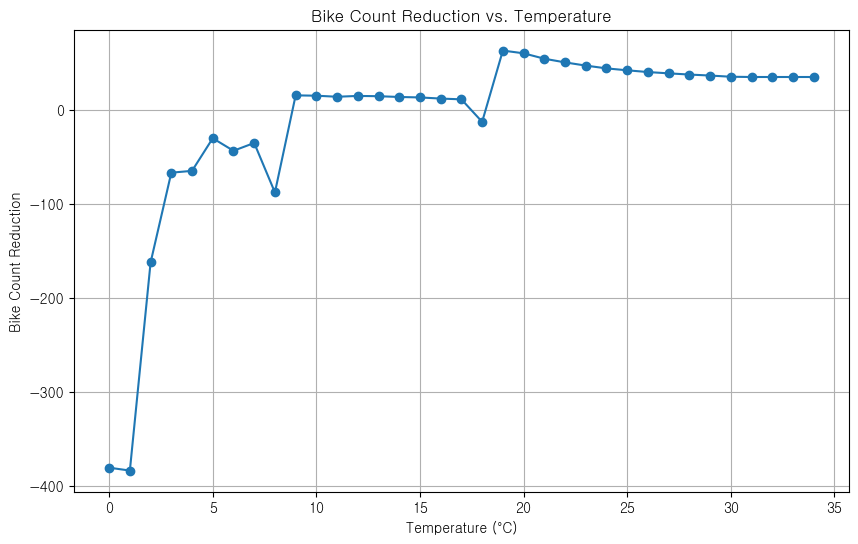

    기온(°C)      이용량_감소
0        0 -380.495045
1        1 -383.551922
2        2 -162.192867
3        3  -66.635827
4        4  -64.692258
5        5  -29.998445
6        6  -43.334776
7        7  -35.023997
8        8  -87.668928
9        9   15.620967
10      10   15.265945
11      11   14.141086
12      12   15.018114
13      13   14.723641
14      14   13.905661
15      15   13.409030
16      16   12.209849
17      17   11.377359
18      18  -12.566264
19      19   63.277821
20      20   60.363711
21      21   54.614786
22      22   50.692177
23      23   47.295279
24      24   44.325044
25      25   42.282415
26      26   40.419754
27      27   39.043762
28      28   37.758371
29      29   36.701136
30      30   35.425807
31      31   35.154345
32      32   35.154345
33      33   35.154345
34      34   35.154345


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# ARIMA 모델을 학습하기 위한 시계열 데이터 준비
시계열_데이터 = 기상청_분석[['평균기온', '전체_건수']]

# ARIMA 모델 학습
model = ARIMA(시계열_데이터['전체_건수'], order=(5,1,0)) # ARIMA 모델 생성
model_fit = model.fit() # 모델 학습

# 결과를 저장할 빈 리스트 생성
결과 = []

# 0°C부터 30°C까지의 기온 범위에 대해 반복문 실행
for 기온 in range(35):
    # 예측 결과에서 특정 기온 범위 내의 이용량 감소 확인
    특정_기온_범위_이용량 = model_fit.predict(start=0, end=len(기상청_분석)-1)
    특정_기온_범위_이용량 = 특정_기온_범위_이용량[기상청_분석['평균기온'] <= 기온]
    이용량_감소 = 특정_기온_범위_이용량.diff().dropna()
    
    # 결과를 딕셔너리 형태로 저장
    결과.append({
        '기온(°C)': 기온,
        '이용량_감소': 이용량_감소.mean() if len(이용량_감소) > 0 else 0
    })

# 결과를 DataFrame으로 변환
결과_df = pd.DataFrame(결과)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(결과_df['기온(°C)'], 결과_df['이용량_감소'], marker='o', linestyle='-')
plt.title('Bike Count Reduction vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Bike Count Reduction')
plt.grid(True)
plt.show()

# 결과 출력
print(결과_df)
결과_df.to_csv('check1.csv',index=False)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# 기준_날짜를 날짜형식으로 변환
기상청_분석['기준_날짜'] = pd.to_datetime(기상청_분석['기준_날짜'])

# 기온과 이용량 간의 상관관계 분석
correlation_temperature = 기상청_분석['평균기온'].corr(기상청_분석['전체_건수'])
print("기온과 이용량 간의 상관관계:", correlation_temperature)

# 시계열 분해를 통한 데이터 탐색
result = seasonal_decompose(기상청_분석['전체_건수'], model='additive', period=30)
result.plot()
plt.show()

# 이상치 처리
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

기상청_분석 = remove_outliers(기상청_분석, '전체_건수')

# 이상치 처리 후 시계열 분해 재시도
result_filtered = seasonal_decompose(기상청_분석['전체_건수'], model='additive', period=30)
result_filtered.plot()
plt.show()

KeyError: '기준_날짜'